In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/titanic_train.csv')

In [ ]:
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df1['Embarked'].fillna('C', inplace=True)
df1['Age'].fillna(int(df1['Age'].mean()), inplace=True)


In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking for how many are survived
#separating the predicting attributes from the others
y = df1['Survived']

In [ ]:

#droping the extra unnecessary attributes
x = df1.drop('Survived',axis=1)
x.drop(['Ticket', 'PassengerId', 'Name', 'Cabin'],axis=1,inplace=True)

print(x)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female  29.0      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [ ]:
#data manipulation
sex = pd.get_dummies(x,drop_first=True)
x=pd.concat([x,sex],axis=1)
embark=pd.get_dummies(x,drop_first=True)
x=pd.concat([x,embark],axis=1)
x= x.drop(['Embarked', 'Sex'],axis=1)
print(x)

     Pclass   Age  SibSp  Parch     Fare  Pclass   Age  SibSp  Parch     Fare  \
0         3  22.0      1      0   7.2500       3  22.0      1      0   7.2500   
1         1  38.0      1      0  71.2833       1  38.0      1      0  71.2833   
2         3  26.0      0      0   7.9250       3  26.0      0      0   7.9250   
3         1  35.0      1      0  53.1000       1  35.0      1      0  53.1000   
4         3  35.0      0      0   8.0500       3  35.0      0      0   8.0500   
..      ...   ...    ...    ...      ...     ...   ...    ...    ...      ...   
886       2  27.0      0      0  13.0000       2  27.0      0      0  13.0000   
887       1  19.0      0      0  30.0000       1  19.0      0      0  30.0000   
888       3  29.0      1      2  23.4500       3  29.0      1      2  23.4500   
889       1  26.0      0      0  30.0000       1  26.0      0      0  30.0000   
890       3  32.0      0      0   7.7500       3  32.0      0      0   7.7500   

     ...   Age  SibSp  Parc

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
fitness=LR.fit(x_train,y_train)
print(fitness)

LinearRegression()


In [ ]:
y_prediction =  LR.predict(x_test)
print(y_prediction)

[ 1.19548850e-01  2.46983173e-01  1.44245708e-01  8.67353643e-01
  7.22213016e-01  9.61962672e-01  6.63740840e-01  8.93481263e-02
  7.25740431e-01  9.37662753e-01  3.48835621e-01  2.98287130e-02
  4.84471000e-01  1.70356844e-01  2.24012931e-01  9.76200210e-01
  3.24798430e-01  6.63768584e-01  2.66935724e-01  3.39510130e-01
  1.25158682e-01  3.92594546e-01  6.23132033e-01  1.44701100e-01
  1.03626148e-01  4.34093569e-02  4.38437823e-01  2.47858927e-01
  7.20245527e-02  6.04653475e-01  1.49004679e-01  6.47539767e-01
  4.91941162e-01  6.14085312e-01  1.53827895e-01  1.48445008e-01
  4.24344941e-01  6.63740840e-01  1.00017228e+00  1.01312686e-01
  2.39240497e-01  6.22630959e-02  1.01366702e-01  1.50847080e-01
  5.94609956e-01  7.49309728e-02  1.49096633e-01  1.30393503e-01
  1.24862397e-01  3.43291888e-01  7.09557144e-01  7.84708516e-01
 -6.14330714e-02  4.56999860e-01 -2.08440950e-02  9.61126391e-01
  2.42213974e-01  9.61000815e-01  7.44478303e-01  7.11478092e-01
  1.39423964e-01  8.29240

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('the value Survival rate from the given dataset is ',score)

print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_prediction)))


the value Survival rate from the given dataset is  0.44318123911475327
mean_sqrd_error is= 0.13502954876808984
root_mean_squared error of is= 0.3674636699975793


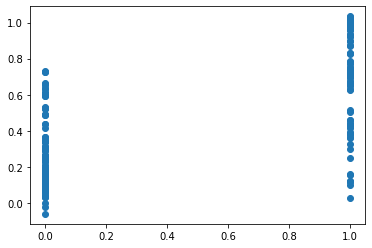

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test,y_prediction)

In [ ]:
# working on titanic_test

df = pd.read_csv('/content/titanic_test.csv')


In [ ]:
print(df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df['Embarked'].fillna('C', inplace=True)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
y = df['Age']

In [ ]:
#droping the extra unnecessary attributes
x = df.drop('Age',axis=1)
x.drop(['Ticket', 'PassengerId', 'Name', 'Cabin','Fare','SibSp'],axis=1,inplace=True)
#data manipulation
sex = pd.get_dummies(x,drop_first=True)
x=pd.concat([x,sex],axis=1)
embark=pd.get_dummies(x,drop_first=True)
x=pd.concat([x,embark],axis=1)
x= x.drop(['Embarked', 'Sex'],axis=1)
print(x)


     Pclass  Parch  Pclass  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass  \
0         3      0       3      0         1           1           0       3   
1         3      0       3      0         0           0           1       3   
2         2      0       2      0         1           1           0       2   
3         3      0       3      0         1           0           1       3   
4         3      1       3      1         0           0           1       3   
..      ...    ...     ...    ...       ...         ...         ...     ...   
413       3      0       3      0         1           0           1       3   
414       1      0       1      0         0           0           0       1   
415       3      0       3      0         1           0           1       3   
416       3      0       3      0         1           0           1       3   
417       3      1       3      1         1           0           0       3   

     Parch  Pclass  Parch  Sex_male  Embarked_Q  Em

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
fitness=LR.fit(x_train,y_train)
print(fitness)

LinearRegression()


In [ ]:
y_prediction =  LR.predict(x_test)
print(y_prediction)

[24.96824979 38.55809354 30.56981229 24.19871854 21.30418729 31.81981229
 23.30418729 39.45262479 30.92918729 24.19871854 24.19871854 37.74168729
 23.20262479 39.32396268 24.19871854 24.19871854 23.30418729 39.45262479
 29.70262479 31.81981229 31.81981229 39.45262479 22.42918729 31.81981229
 22.07762479 29.66746854 39.32396268 39.45262479 22.95262479 31.81981229
 24.19871854 23.30418729 38.55809354 24.19871854 30.92918729 31.81981229
 29.66746854 32.59324979 30.92918729 40.21824979 29.66746854 21.30418729
 32.59324979 39.45262479 40.21824979 24.19871854 15.30418729 31.69530057
 38.55809354 24.19871854 30.56981229 24.0668826  23.30418729 31.81981229
 32.59324979 30.92918729 24.19871854 31.81981229 21.30418729 30.56981229
 24.19871854 31.81981229 39.32396268 31.81981229 29.17918729 31.81981229
 24.19871854 24.19871854 40.21824979 40.21824979 40.21824979 31.81981229
 24.19871854 38.55809354 40.21824979 23.30418729 39.45262479 23.30418729
 22.42918729 24.19871854 24.19871854 36.45262479 24

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)

print('mean_sqrd_error is=',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.13793439389073192
mean_sqrd_error is= 107.59121204609681
root_mean_squared error of is= 10.372618379468937


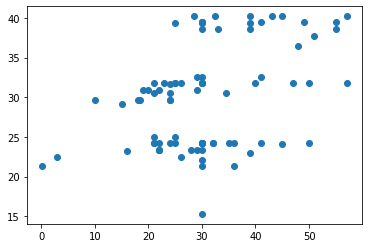

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test,y_prediction)